In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from scipy.optimize import curve_fit
from lib import histfit
rubidium_mass = 1.41810133E-25 # kg
import scipy.constants as scc

In [16]:
def get_means_stds(names, N_tot_range=None, treshold=None):
    times = {} 
    diffs = {}
    means = {}
    stds = {}
    N_tot = {}

    #data_times_ = len(names)*[0]
    #lens = np.zeros(len(names))
    #for i, name in enumerate(names):
    #    data_times_[i] = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-02-02/Time-2023-02-02-"+name+".txt", "r")
    #    for h, dat in enumerate(data_times_[i]):
    #        pass
    #    lens[i] = h+1

    #print(lens)
    #min_len = min(lens)
    
    for name in names:
        diffs[name] = []
        times[name] = []

        #data_times = open("data/2023-01-16/Time-2023-01-17-"+name+".txt", "r")
        data_times = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-02-02/Time-2023-02-02-"+name+".txt", "r")
        N_row = 0

        for row in data_times:
            N_row += 1
            row = row.replace("\n", "")
            row = row.replace(",", ".")
            terms = row.split("\t")
            terms = np.sort([float(terms[term]) for term in range(len(terms))])
            #diffs[name] = diffs[name] + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
            
            for i, term in enumerate(terms):
                if term > 1 and term < treshold:
                    times[name].append(term)
                    if i < len(terms)-1 and terms[i+1] > 1:
                        diffs[name].append(terms[i+1] - term)

        if len(times[name]) >= 1:
            means[name] = np.mean(times[name])
            stds[name] = np.std(times[name])/np.sqrt(N_row)#/np.sqrt(len(times[name]))
        else:
            means[name] = 0
            stds[name] = 0
        
        #print(N_row)
        if N_tot_range == None:
            N_tot[name] = len(times[name])
        else:
            N_aus = 0
            for val in times[name]:
                if val < N_tot_range:
                    N_aus += 1
            N_tot[name] = N_aus
        
    
    return times, diffs, means, stds, N_tot

#def fit_function(theta):
#    def fun(x):
#        return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
#    return fun

def fit_function(theta):
   if theta[1] <= 0:
      def fun(x):
         return 0
   else:
      def fun(x):
         return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun    

def gaussian(x, mean=0, std=1):
    return np.e**(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

def line_(x, a, b):
    return a*x + b

def temp_expansion_(t, s_0, T):
    return np.sqrt(s_0**2 + scc.Boltzmann*T/rubidium_mass * t**2)

262
[1.34359958e-06 3.54887375e-09]


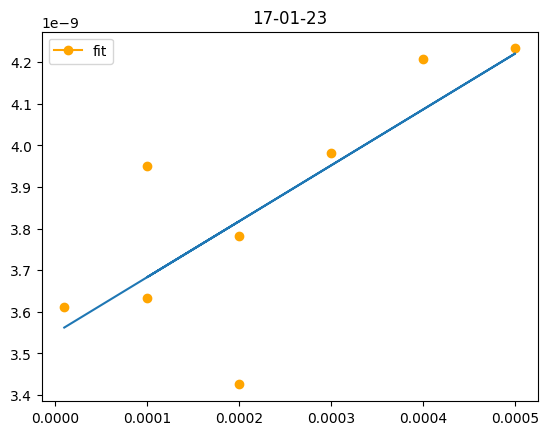

In [17]:
names = ["10", "100", "200", "300", "400", "500"]#, "600", "750", "1000"] 
for i in range(len(names)):
    names[i] = "1_"+names[i]+"_100"
names = names + ["1_100_100_2", "1_200_100_2"]

#eval_times = np.array([10, 100, 200, 300, 400, 500, 600, 750, 1000, 100, 200])*10**-6
eval_times = np.array([10, 100, 200, 300, 400, 500, 100, 200])*10**-6
max_N_row = 0

tresholds = 8.455
times, diffs, means, stds, N_tot = get_means_stds(names, treshold=tresholds)
print(len(times[names[0]]))
stds_fit = {}
stds_std_fit = {}
mean_fit = {}

for i, name in enumerate(names):
    
    bins_range = [8.35,8.455]
    reps = 100
    min_fits_aus_0 = []
    min_fits_aus_1 = []
    for _ in range(reps):
        times_aus = np.random.choice(times[name], 100)
    #theta_0 = [8.4, 0.03]
        theta_0 = [np.mean(times_aus), np.std(times_aus)]
        n_bins = 50
        min_fit = histfit.hist_fit(times_aus, bins_range, n_bins, fit_function, theta_0)
        min_fits_aus_0.append(min_fit.x[0])
        min_fits_aus_1.append(min_fit.x[1])
    mean_fit[name] = np.mean(np.array(min_fits_aus_0))* 1e-6#(min_fit.x[0]) * 10**-6
    stds_fit[name] = np.mean(np.array(min_fits_aus_1))* 1e-6#(min_fit.x[1]) * 10**-6
    stds_std_fit[name] = np.std(np.array(min_fits_aus_1))* 1e-6
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[name]/np.sqrt(10), marker="o", c="orange")
    #plt.plot(eval_times[i], stds[name], marker="*", c="blue")
stds_fit_ = np.array(list((stds_fit.values())))
result = curve_fit(line_, eval_times, stds_fit_/np.sqrt(10), p0=[1e-7, 5])
print(result[0])
y = line_(np.array(eval_times), result[0][0], result[0][1])

plt.plot(eval_times, y)
plt.plot([], [], marker="o", c="orange", label="fit")
#plt.plot([], [], marker="*", c="blue", label="row")
plt.title("17-01-23")
plt.legend()
plt.show()

[1.35501171e-05 3.38191567e-06]
[3.67187104e-07            nan] [           nan 1.31078581e-06]


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_69603/4075322192.py:11: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(result_2[1][0]), np.sqrt(result_2[1][1]))


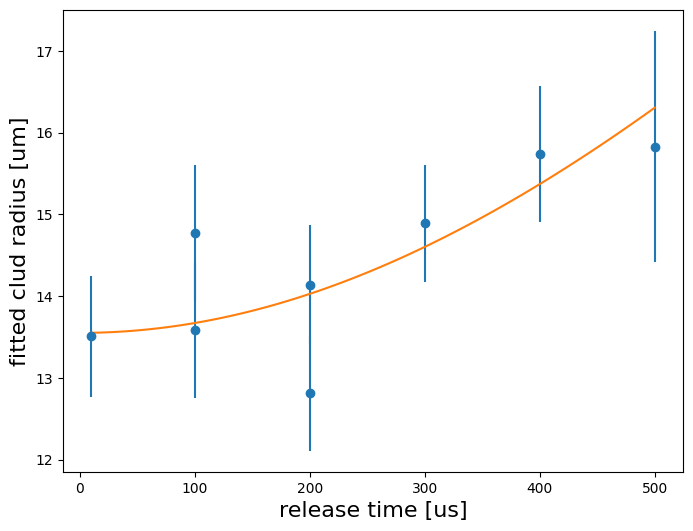

In [18]:
factor = 3.74 *10**6 *10**-3 # m/s
ang_coeff = result[0][0] * factor
interc = result[0][1] * factor
fs = 16

delta_ss = np.array([factor * stds_fit[name]/np.sqrt(10) for name in names])
delta_ss_std = np.array([factor * stds_std_fit[name] for name in names])/np.sqrt(10)

result_2 = curve_fit(temp_expansion_, eval_times[0:], delta_ss, sigma = delta_ss_std, p0=[ 13.4e-6, 2.3e-6]) 
print(result_2[0])
print(np.sqrt(result_2[1][0]), np.sqrt(result_2[1][1]))
x = np.linspace(min(eval_times), max(eval_times), 100)
y = temp_expansion_(x, result_2[0][0], result_2[0][1]) #13.4e-12, 2.3e-18
plt.figure(figsize=(8,6))
plt.errorbar(eval_times*1e6, delta_ss*1e6, delta_ss_std*1e6, marker="o", ls="")
plt.plot(x*1e6, y*1e6)
plt.ylabel("fitted clud radius [um]", fontsize=fs)
plt.xlabel("release time [us]", fontsize=fs)
plt.show()

[1.32213335e-06 3.46443886e-09]


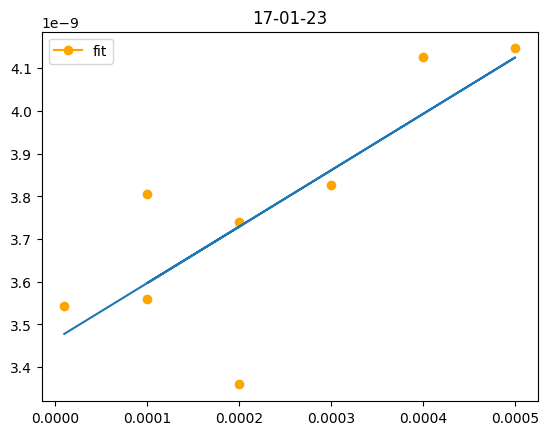

In [12]:
names = ["10", "100", "200", "300", "400", "500"]#, "600", "750", "1000"] 
for i in range(len(names)):
    names[i] = "1_"+names[i]+"_100"
names = names + ["1_100_100_2", "1_200_100_2"]

#eval_times = np.array([10, 100, 200, 300, 400, 500, 600, 750, 1000, 100, 200])*10**-6
eval_times = np.array([10, 100, 200, 300, 400, 500, 100, 200])*10**-6
max_N_row = 0

times, diffs, means, stds, N_tot = get_means_stds(names, )
stds_fit = {}
stds_std_fit = {}
mean_fit = {}

for i, name in enumerate(names):
    bins_ranges = [[8.35,8.45], [8.35,8.4525], [8.35,8.455], [8.35,8.4575]]
    min_fits_aus_0 = []
    min_fits_aus_1 = []
    for bins_range in bins_ranges:
    #theta_0 = [8.4, 0.03]
        theta_0 = [np.mean(times[name]), np.std(times[name])]
        n_bins = 50
        min_fit = histfit.hist_fit(times[name], bins_range, n_bins, fit_function, theta_0)
        min_fits_aus_0.append(min_fit.x[0])
        min_fits_aus_1.append(min_fit.x[1])
    mean_fit[name] = np.mean(np.array(min_fits_aus_0))* 1e-6#(min_fit.x[0]) * 10**-6
    stds_fit[name] = np.mean(np.array(min_fits_aus_1))* 1e-6#(min_fit.x[1]) * 10**-6
    stds_std_fit[name] = np.std(np.array(min_fits_aus_1))* 1e-6
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[name]/np.sqrt(10), marker="o", c="orange")
    #plt.plot(eval_times[i], stds[name], marker="*", c="blue")
stds_fit_ = np.array(list((stds_fit.values())))
result = curve_fit(line_, eval_times, stds_fit_/np.sqrt(10), p0=[1e-7, 5])
print(result[0])
y = line_(np.array(eval_times), result[0][0], result[0][1])

plt.plot(eval_times, y)
plt.plot([], [], marker="o", c="orange", label="fit")
#plt.plot([], [], marker="*", c="blue", label="row")
plt.title("17-01-23")
plt.legend()
plt.show()

In [13]:
mean_fit

{'1_10_100': 8.426341723446229e-06,
 '1_100_100': 8.426619091564379e-06,
 '1_200_100': 8.427902758177414e-06,
 '1_300_100': 8.427873117834754e-06,
 '1_400_100': 8.42764318996954e-06,
 '1_500_100': 8.4260012331425e-06,
 '1_100_100_2': 8.427749086820594e-06,
 '1_200_100_2': 8.43085717148402e-06}

$$ \Delta t = \sqrt{\alpha^2 + \beta^2} \Delta s $$
$$ \alpha = -2.31 \times 10^{-1} \ \mu s / mm$$
$$ \beta = 1.34 \times 10^{-1} \ \mu s / mm$$

$$ \Delta s \ [mm] = \frac{\Delta t}{\sqrt{\alpha^2 + \beta^2}} = 3.74 \ \Delta t \ [\mu s]$$

In [14]:
list(stds_std_fit.values())

[4.324990379952048e-10,
 5.212706246130931e-10,
 5.026876871358931e-10,
 4.646263984641877e-10,
 5.581429198918281e-10,
 3.614629101866683e-10,
 4.748159639085647e-10,
 5.251567341189945e-10]

[1.33766857e-05 2.68120417e-06]
[2.89055463e-07            nan] [           nan 6.69003827e-07]


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_64638/4075322192.py:11: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(result_2[1][0]), np.sqrt(result_2[1][1]))


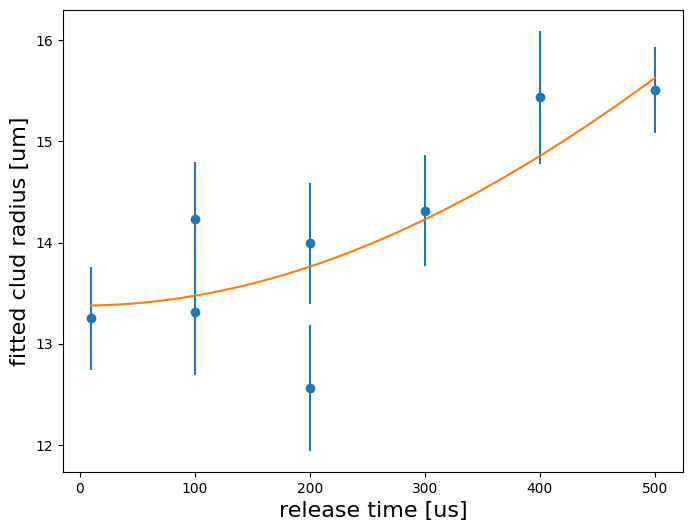

In [15]:
factor = 3.74 *10**6 *10**-3 # m/s
ang_coeff = result[0][0] * factor
interc = result[0][1] * factor
fs = 16

delta_ss = np.array([factor * stds_fit[name]/np.sqrt(10) for name in names])
delta_ss_std = np.array([factor * stds_std_fit[name] for name in names])/np.sqrt(10)

result_2 = curve_fit(temp_expansion_, eval_times[0:], delta_ss, sigma = delta_ss_std, p0=[ 13.4e-6, 2.3e-6]) 
print(result_2[0])
print(np.sqrt(result_2[1][0]), np.sqrt(result_2[1][1]))
x = np.linspace(min(eval_times), max(eval_times), 100)
y = temp_expansion_(x, result_2[0][0], result_2[0][1]) #13.4e-12, 2.3e-18
plt.figure(figsize=(8,6))
plt.errorbar(eval_times*1e6, delta_ss*1e6, delta_ss_std*1e6, marker="o", ls="")
plt.plot(x*1e6, y*1e6)
plt.ylabel("fitted clud radius [um]", fontsize=fs)
plt.xlabel("release time [us]", fontsize=fs)
plt.show()

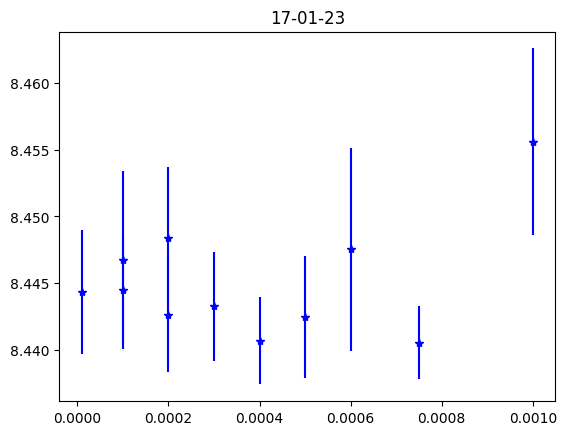

In [8]:
for i, name in enumerate(names):
    #plt.errorbar(eval_times[i], mean_fit[name], stds_fit[name]/np.sqrt(10), marker="o", c="orange")
    plt.errorbar(eval_times[i], means[name], stds[name], marker="*", c="blue")
plt.plot([], [], marker="o", c="orange", label="fit")
plt.plot([], [], marker="*", c="blue", label="row")
plt.title("17-01-23")
plt.show()

In [10]:
names = ["100"]
#times, diffs, means, stds = get_means_stds(names)
bins_range = [8.35,8.55]
n_bins = 50
for name in names:
    color = (uniform(0, 1), uniform(0, 1), uniform(0, 1))
    bins=np.linspace(bins_range[0],bins_range[1],n_bins)
    delta_t = bins[1]-bins[0]
    histo = plt.hist(times[name], bins=bins, alpha = 0.5, label = name, color=color)
    x = bins
    y = gaussian(x, mean_fit[name], stds_fit[name])*N_tot[name]*delta_t
    plt.plot(x,y, c=color)
plt.legend()
plt.show()

KeyError: '100'

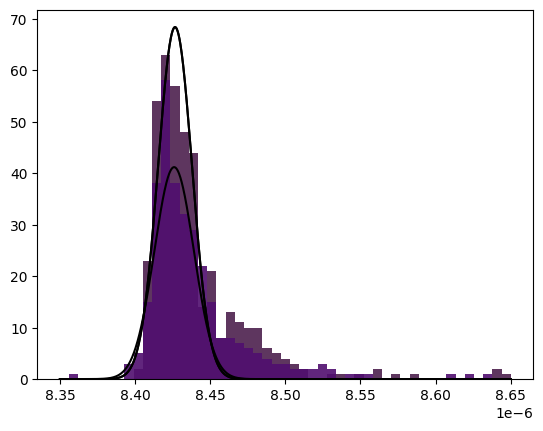

In [11]:
names2 = ["100", "100", "500"]# "200", "300", "400", "500", "600", "750", "1000"] 
for i in range(len(names2)):
    names2[i] =  "1_"+names2[i]+"_100" 
#names2 = names2 + ["1_100_100_2", "1_200_100_2"]
#times, diffs, means, stds = get_means_stds(names)
bins_range = [8.35e-6,8.65e-6]
n_bins = 50
for name in names2:
    color = (uniform(0, 1), uniform(0, 1), uniform(0, 1))
    bins=np.linspace(bins_range[0],bins_range[1],n_bins)
    delta_t = bins[1]-bins[0]
    histo = plt.hist(np.array(times[name])*1e-6, bins=bins, alpha = 0.9, label = name, color=color)
    x = np.linspace(bins_range[0], bins_range[1], 1000)
    y = gaussian(x, mean_fit[name], stds_fit[name])*(N_tot[name]-100)*delta_t
    plt.plot(x,y, c="black")
#plt.legend()
plt.show()

In [ ]:
mean_fit

{'1_10_100': 8.426341723446229e-06,
 '1_100_100': 8.426619091564379e-06,
 '1_200_100': 8.427902758177414e-06,
 '1_300_100': 8.427873117834754e-06,
 '1_400_100': 8.42764318996954e-06,
 '1_500_100': 8.4260012331425e-06,
 '1_600_100': 8.42815177238591e-06,
 '1_750_100': 8.430367000066146e-06,
 '1_1000_100': 8.430172938681947e-06,
 '1_100_100_2': 8.427749086820594e-06,
 '1_200_100_2': 8.43085717148402e-06}